# Prueba de Fisher

## 1. Ejemplo de prueba de placebo
En este ejemplo, aplicamos la prueba exacta de Fisher a una tabla de contingencia 2x2 sobre un tratamiento médico 
    + (15 mejoraron con el tratamiento y 5 no mejoraron, mientras que 4 mejoraron con el placebo y 10 no mejoraron). 

Razón de momios (Odds ratio): 7.5
Valor p: 0.013471123675698804


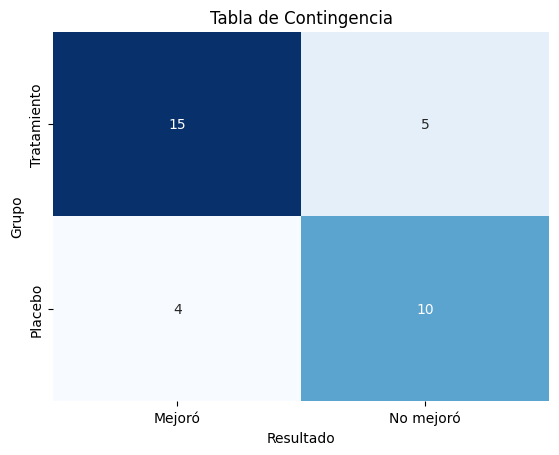

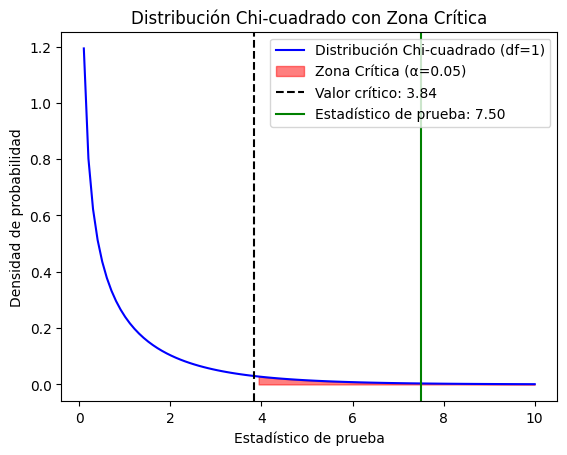

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la tabla de contingencia
contingency_table = np.array([[15, 5], [4, 10]])

# Crear un DataFrame para la tabla de contingencia
df_contingency = pd.DataFrame(contingency_table, 
                              columns=["Mejoró", "No mejoró"], 
                              index=["Tratamiento", "Placebo"])

# Realizar la prueba exacta de Fisher
oddsratio, p_value = stats.fisher_exact(contingency_table)

# Imprimir los resultados
print(f"Razón de momios (Odds ratio): {oddsratio}")
print(f"Valor p: {p_value}")

# Gráfico 1: Representación de la tabla de contingencia
sns.heatmap(df_contingency, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Tabla de Contingencia")
plt.ylabel("Grupo")
plt.xlabel("Resultado")
plt.show()

# Gráfico 2: Distribución de la prueba exacta de Fisher (simulación)
# En este caso no es trivial calcular la distribución exacta de Fisher, 
# así que simulamos la distribución chi-cuadrado de la prueba.

# Parámetros para simular la distribución chi-cuadrado
df = 1  # grados de libertad para una tabla 2x2
critical_value = stats.chi2.ppf(0.95, df)

# Generar valores x para la gráfica de la distribución chi-cuadrado
x = np.linspace(0, 10, 100)
y = stats.chi2.pdf(x, df)

# Graficar la distribución chi-cuadrado
plt.plot(x, y, label='Distribución Chi-cuadrado (df=1)', color='blue')
plt.fill_between(x, 0, y, where=(x >= critical_value), color='red', alpha=0.5, label='Zona Crítica (α=0.05)')
plt.axvline(critical_value, color='black', linestyle='--', label=f"Valor crítico: {critical_value:.2f}")
plt.axvline(oddsratio, color='green', linestyle='-', label=f'Estadístico de prueba: {oddsratio:.2f}')
plt.title('Distribución Chi-cuadrado con Zona Crítica')
plt.xlabel('Estadístico de prueba')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.show()


**Observaciones e interpretación**
Razón de momios (odds ratio): 7.5
Valor p: 0.0135
+ Dado que el valor p es menor que 0.05, podemos rechazar la hipótesis nula y concluir que hay una asociación significativa entre el tratamiento y la mejora en los pacientes.
+ La razón de momios (también conocida como odds ratio, OR) es una medida estadística que compara las probabilidades de un evento entre dos grupos, 
    + y se utiliza comúnmente en estudios de casos y controles. Indica cuántas veces más probable es que ocurra un evento en un grupo comparado con otro. 
    + Es especialmente útil en estudios donde se evalúan resultados binarios, como "mejoró" o "no mejoró" en este ejemplo.
+ El tratamiento tiene un efecto significativo en la mejora de los pacientes, 
    + ya que las probabilidades de mejorar con el tratamiento son significativamente mayores que con el placebo. 
+ Esto se refleja en la razón de momios de 7.5, 
    + que sugiere que los pacientes con tratamiento tienen 7.5 veces más probabilidades de mejorar en comparación con los pacientes que recibieron el placebo.

________________________________________________________________________________________________________________________________________

## 2. Uso del casco en bicicletas
+ Lesiones recibidas:
    + Con casco:
        + Lesiones Faciales: 2
        + Lesiones No Faciales: 6
    + Sin casco:
        + Lesiones Faciales: 13
        + Lesiones No Faciales: 19

+ ¿Es indiferente usar el casco o realmente sí conviene usarlo?

Razón de momios (Odds ratio): 0.48717948717948717
Valor p: 0.6856608930912337


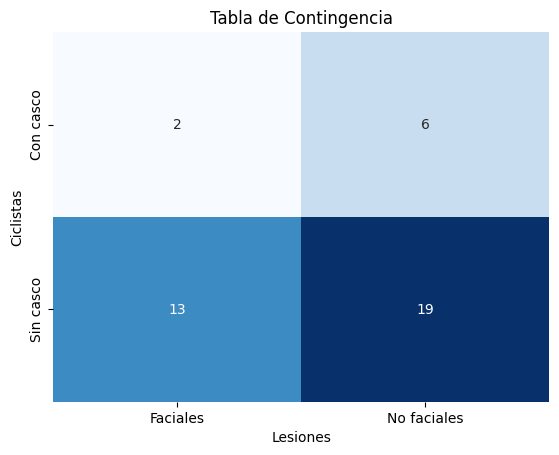

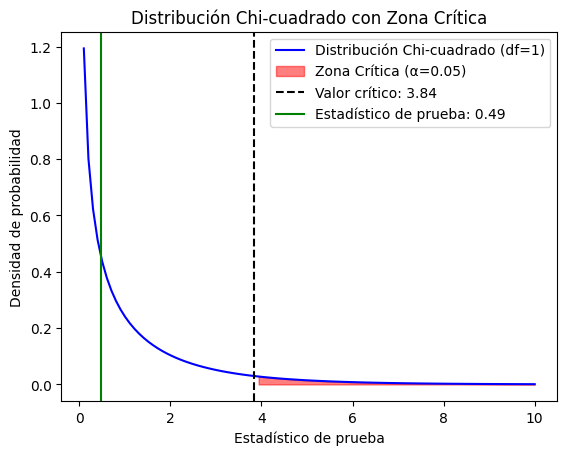

In [6]:
# Definir la tabla de contingencia
contingency_table = np.array([[2, 6], [13, 19]])

# Crear un DataFrame para la tabla de contingencia
df_contingency = pd.DataFrame(contingency_table, 
                              columns=["Faciales", "No faciales"], 
                              index=["Con casco", "Sin casco"])

# Realizar la prueba exacta de Fisher
oddsratio, p_value = stats.fisher_exact(contingency_table)

# Imprimir los resultados
print(f"Razón de momios (Odds ratio): {oddsratio}")
print(f"Valor p: {p_value}")

# Gráfico 1: Representación de la tabla de contingencia
sns.heatmap(df_contingency, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Tabla de Contingencia")
plt.ylabel("Ciclistas")
plt.xlabel("Lesiones")
plt.show()

# Gráfico 2: Distribución de la prueba exacta de Fisher (simulación)
# En este caso no es trivial calcular la distribución exacta de Fisher, 
# así que simulamos la distribución chi-cuadrado de la prueba.

# Parámetros para simular la distribución chi-cuadrado
df = 1  # grados de libertad para una tabla 2x2
critical_value = stats.chi2.ppf(0.95, df)

# Generar valores x para la gráfica de la distribución chi-cuadrado
x = np.linspace(0, 10, 100)
y = stats.chi2.pdf(x, df)

# Graficar la distribución chi-cuadrado
plt.plot(x, y, label='Distribución Chi-cuadrado (df=1)', color='blue')
plt.fill_between(x, 0, y, where=(x >= critical_value), color='red', alpha=0.5, label='Zona Crítica (α=0.05)')
plt.axvline(critical_value, color='black', linestyle='--', label=f"Valor crítico: {critical_value:.2f}")
plt.axvline(oddsratio, color='green', linestyle='-', label=f'Estadístico de prueba: {oddsratio:.2f}')
plt.title('Distribución Chi-cuadrado con Zona Crítica')
plt.xlabel('Estadístico de prueba')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.show()


**Hipótesis**
1. Ho: Es indiferente usar el casco. Da lo mismo.
2. H1: No es indiferente usar el casco. No da lo mismo porque previene lesiones.

**Obervaciones**
+ Dado que la hipótesis nula no se cumple porque p es muy elevado y z crítico esta fuera de la zona crítica, se rechaza la hipotesis nula.

**Conclusiones**
+ Es fácil concluir que es mucho más seguro utilizar casco porque previene lesiones.

_________________________________________________________________________________________________________________